In [1]:
import pandas as pd
import matplotlib
import sys
import numpy.random as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_wine=pd.read_csv('winequality-red.csv')
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
X=df_wine.drop("quality",axis=1)
Y=df_wine[["quality"]]

In [5]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [6]:
Y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [7]:
Y.groupby(by=["quality"])["quality"].count()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=31)

#LogisticRegression

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,f1_score

In [6]:
lr=LogisticRegression(random_state=0,solver='liblinear',C=10)
lr=lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)
f1=f1_score(Y_test,y_pred,average='micro')
print(f1)

0.615


/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
lr=LogisticRegression(multi_class='ovr')
lr=lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)
f1=f1_score(Y_test,y_pred,average='micro')
print(f1)

0.6125


/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(Y_test,y_pred)
cm

array([[  0,   1,   0,   1,   0,   0],
       [  0,   0,   7,   3,   0,   0],
       [  0,   0, 131,  26,   4,   0],
       [  0,   0,  62, 106,  12,   0],
       [  0,   0,   6,  28,   9,   0],
       [  0,   0,   0,   3,   1,   0]])

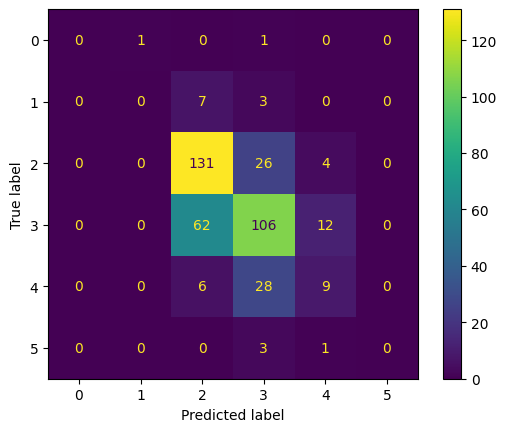

In [12]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#DecisionTreeClassifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=243)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

In [15]:
from sklearn.model_selection import GridSearchCV
cls=DecisionTreeClassifier()
parameters={'min_samples_split':range(2,10),'max_depth':range(1,10),
            'criterion':["gini","entropy","log_loss"],'min_samples_leaf':range(1,10)}
search=GridSearchCV(cls,parameters)
search.fit(X_train,Y_train)
best_tree=search.best_estimator_

In [16]:
y_pred= best_tree.predict(X_test)

In [17]:
f1=f1_score(Y_test,y_pred,average='micro')
f1

0.5246212121212122

In [18]:
cm=confusion_matrix(Y_test,y_pred)
cm

array([[  0,   0,   2,   1,   0,   0],
       [  0,   0,  15,   5,   1,   0],
       [  1,   0, 150,  75,   9,   0],
       [  1,   0,  61, 106,  23,   0],
       [  0,   0,   4,  46,  21,   0],
       [  0,   0,   0,   3,   4,   0]])

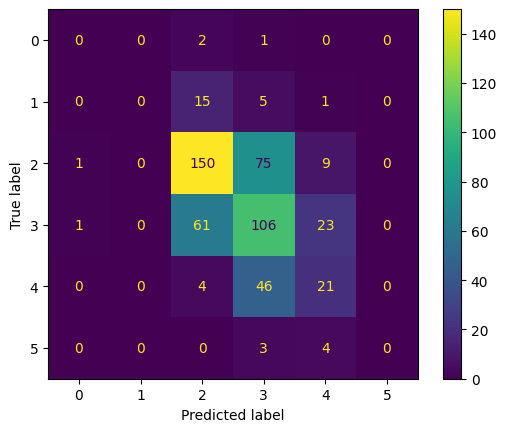

In [19]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

LogisticRegression f1_score=0.615
DecisionTreeClassifier  f1_score=0.5246212